In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.cluster import KMeans

def image_color_clustering(img,n_clusters):
    img_rs = np.reshape(img,(-1,3))
    img_rs.astype(float)
    rgb_sum = np.sum(img_rs,1,dtype=float).reshape((-1,1))
    img_rgb = np.divide(img_rs,rgb_sum,out=np.zeros_like(img_rs,dtype=float), where=(rgb_sum!=0))
    img_rg = img_rgb[:,0:2]
    
    kmeans = KMeans(n_clusters = n_clusters,init = 'k-means++',n_init = 30,max_iter = 1000,random_state=0, n_jobs=-1).fit(img_rg)
    centroids = kmeans.cluster_centers_
    labels = kmeans.predict(img_rg)
    
    index_k = np.zeros(n_clusters,dtype=int)
    for i in range(len(index_k)):
        centroid_dist = np.linalg.norm((img_rg-centroids[i]),axis=1)
        index_k[i] = np.argmin(centroid_dist)
        
    centroid_centers = img_rs[index_k]
    (w,h,d) = img.shape
    
    image_recreated = np.zeros((w,h,d),dtype=int)
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image_recreated[i][j] = centroid_centers[labels[label_idx]]
            label_idx += 1
            
    plt.figure(1)
    plt.clf()
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(img)
    
    plt.figure(2)
    plt.clf()
    plt.axis('off')
    plt.title('Segmented Image (Clusters = ' + str(n_clusters) + ')')
    plt.imshow(image_recreated)
    return image_recreated
    
    

In [2]:
def elbow_plot(img,n):
    
    img_rs = np.reshape(img,(-1,3))
    img_rs.astype(float)
    rgb_sum = np.sum(img_rs,1,dtype=float).reshape((-1,1))
    img_rgb = np.divide(img_rs,rgb_sum,out=np.zeros_like(img_rs,dtype=float), where=(rgb_sum!=0))
    img_rg = img_rgb[:,0:2]
    
    inertia = []
    for i in range(1,n): 
        kMeansVar = KMeans(n_clusters = i).fit(img_rg)
        inertia_s = kMeansVar.inertia_
        inertia.append(inertia_s)
        
    plt.plot(np.arange(1,n),inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

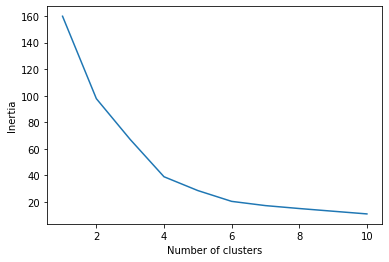

In [3]:
img1 = mpimg.imread(r'C:\Users\rahul\Google Drive\Rahul\Courses\ECE219\Project_2\celebrity_p2.jpg')
elbow_plot(img1,11)

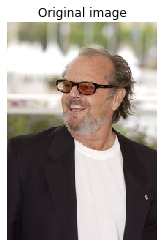

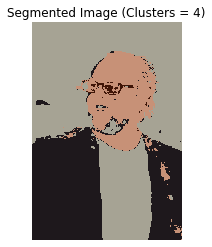

In [4]:
n_clusters = 4
image_recreated1 = image_color_clustering(img1,n_clusters)

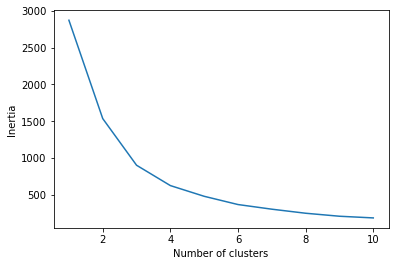

In [5]:
img2 = mpimg.imread(r'C:\Users\rahul\Google Drive\Rahul\Courses\ECE219\Project_2\roger_federer3.jpg')
elbow_plot(img2,11)

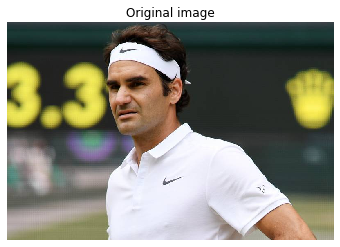

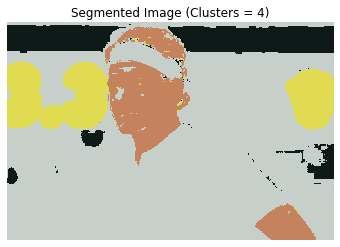

In [6]:
n_clusters = 4
image_recreated2 = image_color_clustering(img2,n_clusters)

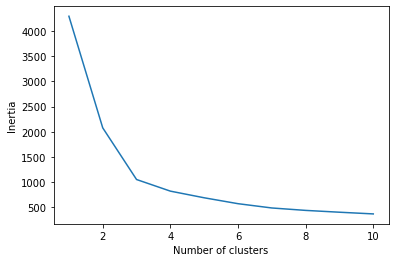

In [7]:
img3 = mpimg.imread(r'C:\Users\rahul\Google Drive\Rahul\Courses\ECE219\Project_2\kobe_bryant3.jpg')
elbow_plot(img3,11)

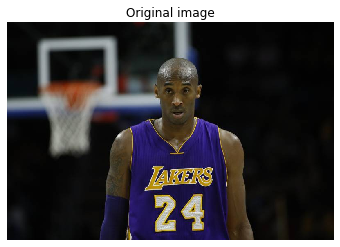

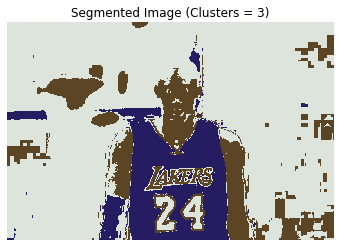

In [8]:
n_clusters = 3
image_recreated3 = image_color_clustering(img3,n_clusters)

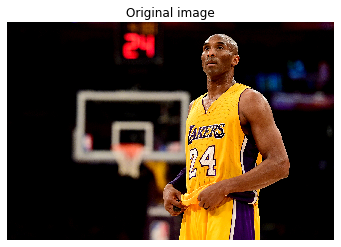

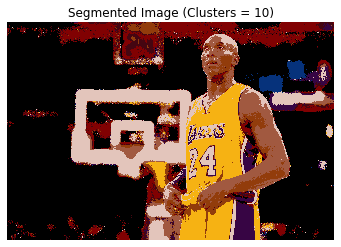

In [9]:
img4 = mpimg.imread(r'C:\Users\rahul\Google Drive\Rahul\Courses\ECE219\Project_2\kobe_bryant.jpg')
n_clusters = 10
image_recreated4 = image_color_clustering(img4,n_clusters)